# STATS 306 Fall 2021
## Homework 7: String --  30 points

**Assigned:** 10/28/2021 

**Due:** 11/04/2021 by 11:59pm

Your uniqid: `<replace with your uniqid>`

For your homework, you will be using the packages `tidyverse` and `stringr`.  As announced in an email, starting from this homework, please name your file correctly,  your file should end with .ipynb so that the GSI can open it without having to convert it to .ipynb from .json.  Also, you should print out all of your output. We will take off some points if you just provide your code without actually running it.  That is, we want to see the output of your code.


In [1]:
library(tidyverse)
library(stringr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Problem 1, Basics on String 20 points

**(a)**  _4 points_
Write a regular expression which matches words of the form `DcccccD`, where `D` is any digit and `c` is any lower case letter. The first and last digits do not have to be the same. Store your regular expression in a variable called `re1`.  Then, output the result using the str_view_all function for the string c("6aaabc3","1Abaacd"). 

**(b)** _4 points_
The *word-boundary* character class `\b` matches the beginning and end of a word: 

In [3]:
str_view_all("These are some words.", "\\b")

HTML widgets cannot be represented in plain text (need html)

Use this character class to write a regular expression `wordbound` such that `str_count(s, wordbound)` counts the number of words in the string `s`. Here a word is defined a consecutive string of letters or apostrophes. 

Try your regular expression out on the string "Don't steal my pancakes!" using the `str_count` function.


**(c)** _4 points_ Write a regular expression to match phone numbers. A phone number can be in any one of the following forms:
```
(123) 456-7890
(123)456-7890
1234567890
123 456 7890
123-456-7890
123.456.7890
```
Store your regular expression in a variable called `phonereg`. Try it out on the above string using str_view_all and see if your pattern identifies all of the above numbers.

**(d)** _4 points_ The `str_trim()` function trims leading and trailing whitespace from a string:

In [7]:
str_trim("   This will be trimmed ")

[1] "This will be trimmed"

The `str_replace()` function uses a regex to find and replace parts of a string:

In [11]:
str_replace("pizza", pattern = "$", replacement = "ioli")
str_replace("three five", " fi", "")
# note use of capture/backreference in this example
str_replace_all("amazonas", pattern = "(.)a", replacement = "\\1e")  

[1] "pizzaioli"

[1] "threeve"

[1] "amezones"

Create a regular expression called `stringreg` which, for a given string `s`, captures the trimmed version of `s` into group 1. That is, for any string `s`, calling `str_replace(s, stringreg, "\\1")` should produce the same output as `str_trim(s)`.

**(e)** _4 points_
For this problem, we define a proper noun as one or more capitalized words, optionally separated by the word(s) "and", "of", "the", and/or "by". Write a regular expression which matches proper nouns. Store your expression in a variable called `nounreg`. (If a capitalized word occurs at the beginning of a sentence, you may assume it is part of a proper noun.)

Try your regular expression using str_view_all on the following string:
"Have Pizza or Fried Chicken and Coke by the river."


## Problem 2, Reddit Dataset 10 points
The file `reddit_xmas_2017.RData` contains 100,000 comments posted to Reddit on Christmas Day, 2017.

In [9]:
load('reddit_xmas_2017.RData')
reddit %>% print

# A tibble: 100,000 x 3
   author        body                                        created_utc        
   <chr>         <chr>                                       <dttm>             
 1 br_shadow     "Thank you for this, there is a person wri… 2017-12-25 15:49:08
 2 Ksalol        "They are not to quick actually. It's main… 2017-12-25 17:42:50
 3 itscool83     "tell her you guys should hang out when yo… 2017-12-25 18:54:13
 4 Glu7enFree    "Autism is a high honor in the tech savvy … 2017-12-25 07:48:17
 5 Theotheogrea… "You thought a cat was your son?! "         2017-12-25 20:58:08
 6 Shadrac121    "Hopfully she takes wat people say in and … 2017-12-25 22:27:31
 7 1fzUjhemoSB1… "Si ce propui sa facem cu toata pielea ram… 2017-12-25 07:41:31
 8 MinisterOfEd… "I don't mean to be impolite, but if you'r… 2017-12-25 19:28:35
 9 AabidS10      "i dont have a 720p x265 of it, sorry. i b… 2017-12-25 13:20:32
10 S3RG10        "I'm dying to try Guatemalan sandals and w… 2017-12-25 00:48:46
# … 

The following problems ask you questions about this data set. Unless specified otherwise, all matches are case insensitive. You may find the function `str_to_lower()` useful.

(*Disclaimer*: I filtered out objectionable comments as best I could, but you will certainly find more if you dig around this data for long enough.)

**(a)** _5 points_
Comment 174 wishes everyone a happy holidays:

In [11]:
reddit %>% slice(174)

author,body,created_utc
<chr>,<chr>,<dttm>
Bareilles,Thank you. Happy holidays everyone!,2017-12-25 01:33:50


What are other people wishing? Count the first occurrence of the string "Happy `<word>`" or "Merry `<word>`" in the comment body, if any, count the matches in a sorted table called `wishingtable`, the first few rows of which are shown below:

<table>
<thead><tr><th scope="col">greeting</th><th scope="col">n</th></tr></thead>
<tbody>
	<tr><td>merry christmas</td><td>2040           </td></tr>
	<tr><td>happy holidays </td><td> 477           </td></tr>
	<tr><td>happy to       </td><td> &mdash;           </td></tr>
	<tr><td>merry xmas     </td><td>  &mdash;           </td></tr>
	<tr><td>happy with     </td><td>  &mdash;           </td></tr>
	<tr><td>happy christmas</td><td>  &mdash;           </td></tr>
	<tr><td>happy for      </td><td>  39           </td></tr>
	<tr><td>happy cake     </td><td>  &mdash;           </td></tr>
	<tr><td>happy about    </td><td>  27           </td></tr>
	<tr><td>happy and      </td><td>  &mdash;           </td></tr>
</tbody>
</table>

**(b)** _5 points_
The number of hourly mentions of the word `christmas`or `xmas` is in the following:

Make a similar plot for hourly mentions of "snow". You may find the function `hour()` useful.  

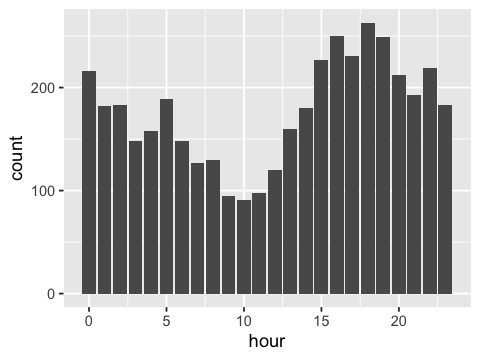

In [17]:
# Do not type here